# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python
!pip freeze > requirements.txt
import torch
torch.cuda.is_available()

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


True

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import random
from ddpg_agent import Agent
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
# env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# while True:
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

### 3. Train the agent with actor critic DDPG

working on cuda:0
Episode 1	Score: 0.00	Average Score: 0.00
Episode 2	Score: 0.00	Average Score: 0.00
Episode 3	Score: 0.00	Average Score: 0.00
Episode 4	Score: 1.15	Average Score: 0.29
Episode 5	Score: 0.33	Average Score: 0.30
Episode 6	Score: 0.10	Average Score: 0.26
Episode 7	Score: 0.00	Average Score: 0.23
Episode 8	Score: 0.55	Average Score: 0.27
Episode 9	Score: 0.79	Average Score: 0.32
Episode 10	Score: 0.53	Average Score: 0.34
Episode 11	Score: 0.40	Average Score: 0.35
Episode 12	Score: 0.00	Average Score: 0.32
Episode 13	Score: 0.17	Average Score: 0.31
Episode 14	Score: 0.40	Average Score: 0.32
Episode 15	Score: 0.00	Average Score: 0.29
Episode 16	Score: 0.07	Average Score: 0.28
Episode 17	Score: 0.49	Average Score: 0.29
Episode 18	Score: 0.39	Average Score: 0.30
Episode 19	Score: 0.36	Average Score: 0.30
Episode 20	Score: 1.14	Average Score: 0.34
Episode 21	Score: 1.32	Average Score: 0.39
Episode 22	Score: 1.28	Average Score: 0.43
Episode 23	Score: 0.70	Average Score: 0.44
Ep

Episode 189	Score: 9.18	Average Score: 7.30
Episode 190	Score: 10.08	Average Score: 7.35
Episode 191	Score: 9.67	Average Score: 7.36
Episode 192	Score: 0.71	Average Score: 7.32
Episode 193	Score: 7.68	Average Score: 7.36
Episode 194	Score: 11.68	Average Score: 7.43
Episode 195	Score: 11.35	Average Score: 7.48
Episode 196	Score: 16.78	Average Score: 7.63
Episode 197	Score: 12.54	Average Score: 7.72
Episode 198	Score: 7.72	Average Score: 7.77
Episode 199	Score: 10.11	Average Score: 7.85
Episode 200	Score: 15.06	Average Score: 7.93
Episode 200	Average Score: 7.93
Episode 201	Score: 11.77	Average Score: 8.00
Episode 202	Score: 10.74	Average Score: 8.06
Episode 203	Score: 7.31	Average Score: 8.07
Episode 204	Score: 8.47	Average Score: 8.11
Episode 205	Score: 14.96	Average Score: 8.22
Episode 206	Score: 9.65	Average Score: 8.25
Episode 207	Score: 10.37	Average Score: 8.32
Episode 208	Score: 7.75	Average Score: 8.34
Episode 209	Score: 11.63	Average Score: 8.38
Episode 210	Score: 6.77	Average 

Episode 369	Score: 14.47	Average Score: 14.20
Episode 370	Score: 20.17	Average Score: 14.30
Episode 371	Score: 16.15	Average Score: 14.36
Episode 372	Score: 13.83	Average Score: 14.40
Episode 373	Score: 18.49	Average Score: 14.44
Episode 374	Score: 12.70	Average Score: 14.38
Episode 375	Score: 15.43	Average Score: 14.42
Episode 376	Score: 19.29	Average Score: 14.43
Episode 377	Score: 16.04	Average Score: 14.25
Episode 378	Score: 12.16	Average Score: 14.27
Episode 379	Score: 12.47	Average Score: 14.22
Episode 380	Score: 20.03	Average Score: 14.33
Episode 381	Score: 18.36	Average Score: 14.33
Episode 382	Score: 16.40	Average Score: 14.40
Episode 383	Score: 12.88	Average Score: 14.41
Episode 384	Score: 11.60	Average Score: 14.41
Episode 385	Score: 14.48	Average Score: 14.39
Episode 386	Score: 14.96	Average Score: 14.38
Episode 387	Score: 2.64	Average Score: 14.24
Episode 388	Score: 13.00	Average Score: 14.18
Episode 389	Score: 11.87	Average Score: 14.19
Episode 390	Score: 8.27	Average Sco

Episode 546	Score: 21.58	Average Score: 18.10
Episode 547	Score: 19.64	Average Score: 18.11
Episode 548	Score: 22.33	Average Score: 18.17
Episode 549	Score: 19.08	Average Score: 18.16
Episode 550	Score: 20.42	Average Score: 18.20
Episode 551	Score: 23.72	Average Score: 18.30
Episode 552	Score: 17.81	Average Score: 18.25
Episode 553	Score: 24.20	Average Score: 18.34
Episode 554	Score: 21.08	Average Score: 18.37
Episode 555	Score: 22.26	Average Score: 18.41
Episode 556	Score: 15.03	Average Score: 18.34
Episode 557	Score: 20.26	Average Score: 18.41
Episode 558	Score: 14.80	Average Score: 18.38
Episode 559	Score: 18.93	Average Score: 18.43
Episode 560	Score: 22.12	Average Score: 18.47
Episode 561	Score: 16.73	Average Score: 18.45
Episode 562	Score: 19.89	Average Score: 18.47
Episode 563	Score: 19.53	Average Score: 18.46
Episode 564	Score: 19.74	Average Score: 18.49
Episode 565	Score: 22.32	Average Score: 18.53
Episode 566	Score: 22.88	Average Score: 18.57
Episode 567	Score: 22.61	Average S

Episode 723	Score: 21.94	Average Score: 23.87
Episode 724	Score: 24.01	Average Score: 23.85
Episode 725	Score: 28.01	Average Score: 23.94
Episode 726	Score: 25.10	Average Score: 23.97
Episode 727	Score: 25.52	Average Score: 23.95
Episode 728	Score: 18.80	Average Score: 23.95
Episode 729	Score: 23.90	Average Score: 23.98
Episode 730	Score: 21.36	Average Score: 23.94
Episode 731	Score: 22.54	Average Score: 23.92
Episode 732	Score: 24.60	Average Score: 23.90
Episode 733	Score: 24.94	Average Score: 23.91
Episode 734	Score: 35.44	Average Score: 24.05
Episode 735	Score: 18.22	Average Score: 24.00
Episode 736	Score: 28.16	Average Score: 24.07
Episode 737	Score: 27.75	Average Score: 24.11
Episode 738	Score: 26.69	Average Score: 24.13
Episode 739	Score: 29.36	Average Score: 24.27
Episode 740	Score: 27.35	Average Score: 24.31
Episode 741	Score: 22.92	Average Score: 24.33
Episode 742	Score: 23.59	Average Score: 24.31
Episode 743	Score: 31.94	Average Score: 24.40
Episode 744	Score: 28.12	Average S

Episode 901	Score: 34.04	Average Score: 27.03
Episode 902	Score: 26.26	Average Score: 27.05
Episode 903	Score: 19.40	Average Score: 26.93
Episode 904	Score: 29.82	Average Score: 26.97
Episode 905	Score: 20.50	Average Score: 26.84
Episode 906	Score: 22.34	Average Score: 26.82
Episode 907	Score: 27.55	Average Score: 26.84
Episode 908	Score: 26.27	Average Score: 26.78
Episode 909	Score: 30.07	Average Score: 26.83
Episode 910	Score: 28.37	Average Score: 26.85
Episode 911	Score: 27.86	Average Score: 26.86
Episode 912	Score: 29.99	Average Score: 26.93
Episode 913	Score: 26.90	Average Score: 26.92
Episode 914	Score: 25.95	Average Score: 26.94
Episode 915	Score: 25.27	Average Score: 26.90
Episode 916	Score: 28.79	Average Score: 26.96
Episode 917	Score: 28.52	Average Score: 27.01
Episode 918	Score: 28.93	Average Score: 27.06
Episode 919	Score: 24.65	Average Score: 26.97
Episode 920	Score: 25.81	Average Score: 26.98
Episode 921	Score: 30.39	Average Score: 27.01
Episode 922	Score: 29.45	Average S

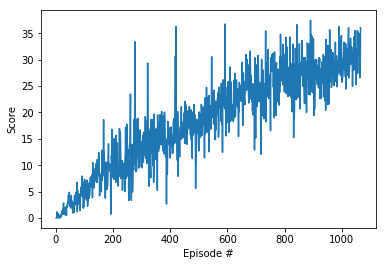

In [6]:
def ddpg(n_episodes=2000, max_t=1000, print_every=100):
    """ Deep Deterministic Policy Gradients
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    scores_window = deque(maxlen=print_every)
    scores = np.zeros(num_agents)
    scores_episode = []
    
    agents =[] 
    # init all agents
    for i in range(num_agents):
        agents.append(Agent(state_size, action_size, random_seed=0))
    # loop throught episodes
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        # reset all agents after each episode
        for agent in agents:
            agent.reset()
            
        scores = np.zeros(num_agents)
        # loop through all timesteps   
        for t in range(max_t):
            actions = np.array([agents[i].act(states[i]) for i in range(num_agents)])
            env_info = env.step(actions)[brain_name]        # send the action to the environment
            next_states = env_info.vector_observations     # get the next state
            rewards = env_info.rewards                     # get the reward
            dones = env_info.local_done        
            
            for i in range(num_agents):
                agents[i].step(states[i], actions[i], rewards[i], next_states[i], dones[i]) 
 
            states = next_states
            scores += rewards
            if np.any(dones):
                break 
        score = np.mean(scores)
        scores_window.append(score)       # save most recent score
        scores_episode.append(score)
        print('\rEpisode {}\tScore: {:.2f}\tAverage Score: {:.2f}'.format(i_episode, score, np.mean(scores_window)), end="\n")
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agents[0].actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agents[0].critic_local.state_dict(), 'checkpoint_critic.pth')
            break
            
    return scores_episode

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch the agent play

In [7]:
from model import Actor, Critic
scores = np.zeros(num_agents)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

agents = []
for i in range(num_agents):
    agents.append(Agent(state_size, action_size, random_seed=0))
random_seed=0
agents[0].actor_local = Actor(state_size, action_size, random_seed).to(device)
agents[0].actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
    

while True:
    actions = np.array([agents[i].act(states[i]) for i in range(num_agents)])

    env_info = env.step(actions)[brain_name]        # send the action to the environment
    next_states = env_info.vector_observations     # get the next state
    rewards = env_info.rewards                     # get the reward
    dones = env_info.local_done        

    states = next_states
    scores += rewards

    print('\rScore: {:.2f}\tmin: {:.2f}\tmax: {:.2f}'
              .format(np.mean(scores), np.min(scores), np.max(scores)), end="") 
    
    if np.any(dones):
        break
        
print("\nScores: {}".format(scores))

working on cuda:0
Score: 0.04	min: 0.04	max: 0.04
Scores: [ 0.04]


In [8]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 